In [216]:
# Import the required libraries
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas

In [217]:
# Read in Crypto Data
File = Path('../Dataset/crypto_df.csv')
crypto_df = pd.read_csv(File)


file2 = Path('../Dataset/btc_df.csv')
btc_df = pd.read_csv(file2)



file3 = Path('../datasets/btc_dataset_hourly.csv')
btc_tw_df = pd.read_csv(file3)
btc_tw_df


,time,nltk_polarity
0,2022-05-27 02:00:00+00:00,0.411728
1,2022-05-27 03:00:00+00:00,NaN
2,2022-05-27 04:00:00+00:00,0.185771
3,2022-05-27 05:00:00+00:00,0.432900
4,2022-05-27 06:00:00+00:00,NaN
...,...,...
137,2022-06-01 19:00:00+00:00,0.272658
138,2022-06-01 20:00:00+00:00,NaN
139,2022-06-01 21:00:00+00:00,0.156100
140,2022-06-01 22:00:00+00:00,0.312003


In [218]:
btc_df['polarity'] = np.random.randint(2, size=121)
btc_df = btc_df.reset_index()
btc_df = btc_df.set_index('date')
btc_df = btc_df.drop(columns='index')

In [219]:
# Create new DF
btc_df = btc_df.drop(columns=['open', 'low'])

# Calculate the hourly returns using the closing prices and the pct_change function
btc_df["actual_returns"] = btc_df["close"].pct_change()
btc_df = btc_df.dropna()
btc_df.head()


,close,polarity,actual_returns
date,,,
2022-05-27 11:59:59.999,40585.27,1,-0.008643
2022-05-27 12:59:59.999,40646.82,0,0.001517
2022-05-27 13:59:59.999,40686.85,1,0.000985
2022-05-27 14:59:59.999,40483.86,0,-0.004989
2022-05-27 15:59:59.999,40366.24,0,-0.002905


In [220]:
# Define a window size of 50 & 100
short_window = 50
long_window = 100

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
btc_df["sma_50"] = btc_df["close"].rolling(window=short_window).mean()
btc_df["sma_100"] = btc_df["close"].rolling(window=long_window).mean()
btc_df = btc_df.dropna()

# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = btc_df[["sma_50", "sma_100", 'polarity']].copy()
# Display sample data
display(X.head())
display(X.tail())

,sma_50,sma_100,polarity
date,,,
2022-05-31 14:59:59.999,42000.3468,41198.2162,1
2022-05-31 15:59:59.999,42070.9810,41232.5033,0
2022-05-31 16:59:59.999,42140.0708,41264.5754,1
2022-05-31 17:59:59.999,42207.7024,41297.0134,1
2022-05-31 18:59:59.999,42276.0212,41331.5796,1


,sma_50,sma_100,polarity
date,,,
2022-06-01 06:59:59.999,43094.7032,41774.1493,1
2022-06-01 07:59:59.999,43164.8026,41818.6019,1
2022-06-01 08:59:59.999,43237.1248,41864.7240,1
2022-06-01 09:59:59.999,43305.1372,41903.8806,1
2022-06-01 10:59:59.999,43370.6334,41945.8684,0


In [221]:
# Create a new column in the btc_df called signal setting its value to zero.
btc_df["Signal"] = 0.0

# Create the signal to buy
btc_df.loc[(btc_df["actual_returns"] >= 0) & (btc_df['polarity'] == 1), "Signal"] = 1

# Create the signal to sell
btc_df.loc[(btc_df["actual_returns"] < 0) & (btc_df['polarity'] != 0), "Signal"] = -1


y = btc_df["Signal"].copy()
btc_df


,close,polarity,actual_returns,sma_50,sma_100,Signal
date,,,,,,
2022-05-31 14:59:59.999,44078.31,1,-0.002762,42000.3468,41198.2162,-1.0
2022-05-31 15:59:59.999,44013.98,0,-0.001459,42070.9810,41232.5033,0.0
2022-05-31 16:59:59.999,43854.03,1,-0.003634,42140.0708,41264.5754,-1.0
2022-05-31 17:59:59.999,43930.65,1,0.001747,42207.7024,41297.0134,1.0
2022-05-31 18:59:59.999,43940.48,1,0.000224,42276.0212,41331.5796,1.0
2022-05-31 19:59:59.999,43900.05,0,-0.000920,42343.7596,41366.9177,0.0
2022-05-31 20:59:59.999,44064.75,1,0.003752,42412.8172,41401.1473,1.0
2022-05-31 21:59:59.999,44260.37,0,0.004439,42487.4998,41437.5345,0.0
2022-05-31 22:59:59.999,44133.09,1,-0.002876,42554.9700,41473.5900,-1.0


In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)

In [223]:
# Imports
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [224]:
# Imports SVM Machine Learning Model
from sklearn import svm
from sklearn.metrics import classification_report

In [225]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 0., 1., 1., 0., 1., 0., 0.])

In [226]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         4
         0.0       1.00      1.00      1.00         5
         1.0       0.56      1.00      0.71         5

    accuracy                           0.71        14
   macro avg       0.52      0.67      0.57        14
weighted avg       0.56      0.71      0.61        14



c:\Users\Sam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [227]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [228]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         4
         0.0       1.00      1.00      1.00         3
         1.0       0.00      0.00      0.00         0

    accuracy                           0.43         7
   macro avg       0.33      0.33      0.33         7
weighted avg       0.43      0.43      0.43         7



c:\Users\Sam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\anaconda3\lib\site-packages\sklearn\metrics\_classificat

In [229]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = btc_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
date,,,
2022-05-31 14:59:59.999,1.0,-0.002762,-0.002762
2022-06-01 07:59:59.999,1.0,-0.001976,-0.001976
2022-06-01 05:59:59.999,1.0,-0.000620,-0.000620
2022-05-31 15:59:59.999,0.0,-0.001459,-0.000000
2022-05-31 22:59:59.999,1.0,-0.002876,-0.002876


<AxesSubplot:xlabel='date'>

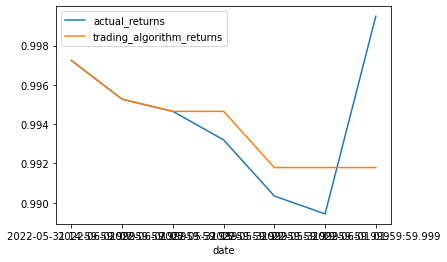

In [230]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [231]:
# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
btc_df["Entry/Exit"] = btc_df["Signal"].diff()

In [232]:
# Visualize exit position relative to close price
exit = btc_df[btc_df["Entry/Exit"] == -1.0]["close"].hvplot.scatter(
    color="red",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)


# Visualize entry position relative to close price
entry = btc_df[btc_df["Entry/Exit"] == 1.0]["close"].hvplot.scatter(
    color="green",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)


# Visualize close price for the investment
security_close = btc_df[["close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400)

# Visualize moving averages
moving_avgs = btc_df[["sma_50", "sma_100"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400)

In [233]:
# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot
entry_exit_plot.opts(
    title="Bitcoin - SMA50, SMA100, Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [date]   (close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [date]   (value)
   .Scatter.Close.I  :Scatter   [date]   (close)
   .Scatter.Close.II :Scatter   [date]   (close)

In [234]:
# Initialize trade_type column for buys and sells
btc_df['trade_type'] = np.nan

# Initialize variable to hold the previous_price
previous_price = 0
tw_sentiment = 0 

# Loop through the Pandas DataFrame and code the conditions of the trading strategy 
for index, row in btc_df.iterrows():
    
    # buy if the previous price is 0 and Twitter Sentiment has Positive for 7 consecutive days.
    if previous_price == 0: #and sum(tw_sentiment == 7):
        btc_df.loc[index, "trade_type"] = "buy"

    # buy if the current day price is less than the previous day price and Twitter Sentiment has Positive for 4 consecutive days
    elif row["BTC"] < previous_price: #and sum(tw_sentiment == 4):
        btc_df.loc[index, "trade_type"] = "buy"

    # sell if the current day price is greater than the previous day price and Twitter Sentiment has Negative for 3 consecutive days
    elif row["BTC"] > previous_price: # and sum(tw_sentiment < 3):
        btc_df.loc[index, "trade_type"] = "sell"

    # else hold if the current day price is equal to the previous day price and Twitter Sentiment is Neutrual or Greater in 4 days
    else:
        btc_df.loc[index, "trade_type"] = "hold"
    
    # reset the previous_price variable to the close price of the current row
    previous_price = row["BTC"]

    # if the index is the last index of the Dataframe, set the trade_type to sell
    if index == btc_df.index[-1]:
        btc_df.loc[index, "trade_type"] = "sell"


btc_df.head()

KeyError: 'BTC'

In [ ]:
# Create a Sell Plot
sell = btc_df[btc_df["trade_type"] == "sell"]["BTC"].hvplot.scatter(
    color="red",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)

# Create a Buy Plot
buy = btc_df[btc_df["trade_type"] == "buy"]["BTC"].hvplot.scatter(
    color="green",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400)

# Create a Hold Plot
neu = btc_df[btc_df["trade_type"] == "hold"]["BTC"].hvplot.scatter(
    color="orange",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400) 

security_close = btc_df[['BTC']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400)    

# Create the overlay plot
buy_sell_plot = buy * sell * neu * security_close

# Show the plot
buy_sell_plot.opts(
    title="Bitcoin - Buy, Sell and Hold Chart"
)     

:Overlay
   .Scatter.BTC.I   :Scatter   [index]   (BTC)
   .Scatter.BTC.II  :Scatter   [index]   (BTC)
   .Scatter.BTC.III :Scatter   [index]   (BTC)
   .Curve.I         :Curve   [index]   (BTC)

In [ ]:
crypto_df = crypto_df.set_index("date")
crypto_df = crypto_df.stack()
crypto_df.head()

# Review the DataFrame
short_window = 50
long_window = 100

    #Generate the short and long moving averages (50 and 100 days, respectively)\n",
    sma_df = crypto_df.copy()
  
    for col in sma_df.columns:
        if col != 'date':,
            slow_col_nam = col +'_'+ 'SMA100',
            fast_col_name = col +'_'+ 'SMA50',
            sma_df = sma_df
            sma_df[slow_col_nam] = sma_df[col].rolling(window=long_window).mean(),
            sma_df[fast_col_name] =  sma_df[col].rolling(window=short_window).mean(),
            sma_df = sma_df.drop(columns = [col]),
    

    # Review the DataFrame\n",
    sma_df.head(2000)
    
    # Generate the trading signal 0 or 1,\n",
    # where 1 is the short-window (SMA50) is less than the long-window (SMA100)\n",
    #for col in sma_df.columns:\n",
        #if col != 'date':\n",
            #new_col_name = col + \"_\" + \"Signal\"\n",
            #sma_50 = ['SMA50' in i for i in sma_df.columns]\n",
            #sma_100 = ['SMA100' in i for i in sma_df.columns]\n",
            #sma_df[new_col_name][short_window:] = np.where(\n",
            #sma_df[sma_50][short_window:] < sma_df[sma_100][short_window:]\n",


IndentationError: unexpected indent (4270126934.py, line 10)